In [5]:
import seaborn as sns
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
#age의 결측치 합계 
df['age'].isnull().sum()

177

In [7]:
#성별 나이의 평균으로 각각 성별 그룹의 나이의 평균으로 값을 채움
df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

C:\Users\user\AppData\Local\Temp\ipykernel_13404\2905335856.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [8]:
#top 함수를나이를 기준으로 상위 5개 반환하게 정의하고 성별로 나눠 출력하게 만드세요 
def top(x):
    return x.sort_values('age').head()

df.groupby('sex').apply(top)

survived  pclass     sex   age  sibsp  parch      fare embarked  \
sex                                                                           
female 469         1       3  female  0.75      2      1   19.2583        C   
       644         1       3  female  0.75      2      1   19.2583        C   
       381         1       3  female  1.00      0      2   15.7417        C   
       172         1       3  female  1.00      1      1   11.1333        S   
       642         0       3  female  2.00      3      2   27.9000        S   
male   803         1       3    male  0.42      0      1    8.5167        C   
       755         1       2    male  0.67      1      1   14.5000        S   
       831         1       2    male  0.83      1      1   18.7500        S   
       78          1       2    male  0.83      0      2   29.0000        S   
       305         1       1    male  0.92      1      2  151.5500        S   

             class    who  adult_male deck  embark_town alive  alone  
sex                                                                   
female 469   Third  child       False  NaN    Cherbourg   yes  False  
       644   Third  child       False  NaN    Cherbourg   yes  False  
       381   Third  child       False  NaN    Cherbourg   yes  False  
       172   Third  child       False  NaN  Southampton   yes  False  
       642   Third  child       False  NaN  Southampton    no  False  
male   803   Third  child       False  NaN    Cherbourg   yes  False  
       755  Second  child       False  NaN  Southampton   yes  False  
       831  Second  child       False  NaN  Southampton   yes  False  
       78   Second  child       False  NaN  Southampton   yes  False  
       305   First  child       False    C  Southampton   yes  False

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset

# 복습

In [67]:
#ㅈ
iris=pydataset.data('iris')
iris[:3]
iris.groupby('Species')['Sepal.Length','Sepal.Width'].agg([('평균','mean'),('최대','max')])

C:\Users\user\AppData\Local\Temp\ipykernel_1028\2295822751.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris.groupby('Species')['Sepal.Length','Sepal.Width'].agg([('평균','mean'),('최대','max')])


Sepal.Length      Sepal.Width     
                     평균   최대          평균   최대
Species                                      
setosa            5.006  5.8       3.428  4.4
versicolor        5.936  7.0       2.770  3.4
virginica         6.588  7.9       2.974  3.8

In [37]:
tips=pydataset.data('tips')
tips[:3]
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips.groupby(['day','smoker'])['tip'].agg([('최소','min'),('최대','max'),('합','sum')])

최소     최대       합
day  smoker                     
Fri  No      1.50   3.50   11.25
     Yes     1.00   4.73   40.71
Sat  No      1.00   9.00  139.63
     Yes     1.00  10.00  120.77
Sun  No      1.01   6.00  180.57
     Yes     1.50   6.50   66.82
Thur No      1.25   6.70  120.32
     Yes     2.00   5.00   51.51

In [66]:
#문자열 -> datetime 
from dateutil.parser import parse
parse('2023/04/10')
parse('10-04-2023', dayfirst=True)

from datetime import datetime, date, time
datetime.strptime('2023/04/10', '%Y/%m/%d')

datetime.datetime(2023, 4, 10, 0, 0)

In [53]:
df=pd.DataFrame({'data1': np.random.randn(100), 'data2':np.random.randn(100)}) 
df.head()
#data1기준 4등분 후 라벨 붙이고 grade컬럼 추가 
df['grade']=pd.cut(df.data1,4,labels=['A','B','C','D'])
df.head()


,data1,data2,grade
0,-0.935345,-0.927807,B
1,-0.780312,0.478450,B
2,-0.167430,0.523965,C
3,-1.287576,1.937288,B
4,0.446525,-1.258536,C


In [73]:
color = pydataset.data("HairEyeColor")
color[:5] 
#pivot을 이용해 hair sex 인덱스로 eye를 칼럼으로 하는 df만들기 
df= color.pivot_table(index=['Hair','Sex'],columns='Eye')
#성별을 기준으로 mean , max 
df.groupby('Sex').agg([('평균','mean'),('최대','max')])


Freq                                   
Eye      Blue     Brown     Green      Hazel    
           평균  최대    평균  최대    평균  최대     평균  최대
Sex                                             
Female  28.50  64  30.5  66  7.75  14  11.50  29
Male    25.25  50  24.5  53  8.25  15  11.75  25

In [120]:
world_phone=pydataset.data('WorldPhones')
world_phone = world_phone.stack().reset_index() #로우가 칼럼으로 스게댐 
world_phone.columns = ["year", "location", "phones"]
world_phone.head()

,year,location,phones
0,1951,N.Amer,45939
1,1951,Europe,21574
2,1951,Asia,2876
3,1951,S.Amer,1815
4,1951,Oceania,1646


In [133]:
from datetime import datetime
dates=[datetime(2011,1,2),
datetime(2011,1,5),
datetime(2011,1,7),
datetime(2011,1,8),
datetime(2011,1,10),
      datetime(2011,1,12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

## 시계열 기초

In [147]:
#시계열 인덱스 
ts=pd.Series(np.random.randn(6), index=dates)
print(ts)
#2개씩 건너뜀 
ts1=ts[::2]
print(ts1)
ts1+ts #NaN 은 계산 안되고 그대로 나옴. 

#index 가 timestamp 
ts.index[0]
ts['2011-01-02'] #날짜로 인덱스 가능

2011-01-02    2.037018
2011-01-05    0.048676
2011-01-07   -0.476216
2011-01-08   -0.954967
2011-01-10    0.231041
2011-01-12   -0.446521
dtype: float64
2011-01-02    2.037018
2011-01-07   -0.476216
2011-01-10    0.231041
dtype: float64


2.0370175235249737

In [146]:
ts.index[0]
ts['2011-01-02']

0.33224329274762676

In [189]:
# 직접 치지 않고 ts만들기, period  - 개수 , Freq:D = Day단위 (1일)단위로 반복 
longer_ts=pd.Series(np.random.rand(1000),index=pd.date_range('1/1/2000', periods=1000))
ts=longer_ts.copy()
ts['2002-09'] #9월치
ts['2002-09-01':'2002-09-10']
ts1= ts.reset_index() #index -> column 
ts1.iloc[:5] #날짜를 컬럼으로 잡아도 가능 
ts1

,index,0
0,2000-01-01,0.491292
1,2000-01-02,0.675107
2,2000-01-03,0.473728
3,2000-01-04,0.489212
4,2000-01-05,0.797278
...,...,...
995,2002-09-22,0.957402
996,2002-09-23,0.511703
997,2002-09-24,0.869414
998,2002-09-25,0.174216


In [174]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
   ....:                           '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates) 
dup_ts['2000-01-02'].count()

3

In [177]:
#dup_ts.mean() 전체 mean , groupby level=0 요일 마다 
dup_ts.groupby(level=0).mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [180]:
index=pd.date_range('2012-04-1','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [185]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2025-03-01', periods=100, freq='W-WED') #Week Wednesday매주 수요일 
pd.date_range(end='2025-03-01', periods=100, freq='BM')#Business Month 비즈니스상 말일 (주말빼고) 


DatetimeIndex(['2016-11-30', '2016-12-30', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31',
               '2017-11-30', '2017-12-29', '2018-01-31', '2018-02-28',
               '2018-03-30', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-29', '2019-04-30', '2019-05-31', '2019-06-28',
               '2019-07-31', '2019-08-30', '2019-09-30', '2019-10-31',
               '2019-11-29', '2019-12-31', '2020-01-31', '2020-02-28',
               '2020-03-31', '2020-04-30', '2020-05-29', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-30',
               '2020-11-30', '2020-12-31', '2021-01-29', '2021-02-26',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
      

In [203]:
mpg=pydataset.data('mpg')
mpg[:3]
mpg[mpg['manufacturer']=='audi']
#cyl =4 또는 6
mpg[mpg.cyl == 4|6] 
mpg[mpg['cyl'].isin([4,6])].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [228]:
#2001년 1월 
ts1[(ts1['index']>'2001-01')&( ts1['index']<'2001-02')]
#2001/1부터 3월까지 
ts1[(ts1['index']>'2001-01')&( ts1['index']<'2001-04')].head()

,index,0
367,2001-01-02,0.862800
368,2001-01-03,0.447581
369,2001-01-04,0.199126
370,2001-01-05,0.222605
371,2001-01-06,0.658570


## 빈도와 날짜 오프셋

In [243]:
from pandas.tseries.offsets import Hour, Minute
hour=Hour(4) #4시간 짜리 객체 
hour


<4 * Hours>

In [242]:
import pandas as pd
from datetime import datetime
pd.date_range('2001-01-01','2001-01-03 23:59') 
pd.date_range('2001-01-01','2001-01-03 23:59', freq='4h')
pd.date_range('2000-01-01','2000-07-03 23:59', freq='WOM-3FRI') #week of month 매월 3째주 금요일 

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19', '2000-06-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shift

In [260]:
ts = pd.Series(np.random.rand(4),
   ....:                index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts 

2000-01-31    0.977545
2000-02-29    0.101659
2000-03-31    0.100617
2000-04-30    0.010534
Freq: M, dtype: float64

In [255]:
ts.shift(3,freq='D')

2000-02-03    0.995057
2000-03-03    0.852174
2000-04-03    0.234596
2000-05-03    0.414049
dtype: float64

In [262]:
ts.shift(3, freq='D')

2000-02-03    0.977545
2000-03-03    0.101659
2000-04-03    0.100617
2000-05-03    0.010534
dtype: float64

In [273]:
from pandas.tseries.offsets import Day,MonthEnd
now=datetime(2011,11,17) 
now+ 3 *Day()
now+ MonthEnd()
MonthEnd().rollforward(now)
MonthEnd().rollback(now)


Timestamp('2011-10-31 00:00:00')

In [265]:
ts.resample('D')

2000-01-31    0.977545
2000-02-29    0.101659
2000-03-31    0.100617
2000-04-30    0.010534
Freq: M, dtype: float64

In [267]:
a=ts.resample('D')
a

In [280]:
#월별 평균 group by , resample 
ts=pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000',periods=20, freq='4d'))
ts.groupby(MonthEnd().rollforward).mean()
ts.resample('M').mean()


2000-01-31    0.795299
2000-02-29    1.015600
2000-03-31   -0.305934
Freq: M, dtype: float64

## 시간대 다루기 

In [291]:
import pytz
pytz.common_timezones[-5:]
#타임존의 기준
tz= pytz.timezone('Asia/Seoul')
tz
#시간대를 엄격히 다루진 않는ㄴ다

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [295]:
rng=pd.date_range('2000-01-01', periods=100, freq='D')
ts=pd.Series(np.random.randn(100),index=rng)
ts[:10]

2000-01-01    1.209146
2000-01-02   -0.686312
2000-01-03    0.937775
2000-01-04   -0.468412
2000-01-05   -1.445074
2000-01-06    0.160098
2000-01-07   -0.853007
2000-01-08   -0.188996
2000-01-09   -1.387614
2000-01-10   -0.326414
Freq: D, dtype: float64

In [301]:
ts.resample('M', kind='period').mean()

2000-01   -0.052833
2000-02   -0.202309
2000-03    0.067810
2000-04   -1.058642
Freq: M, dtype: float64

In [309]:
#분단위 freq='T'
rng=pd.date_range('2000-01-01', periods=12, freq='T')
ts=pd.Series(np.arange(len(rng)),index=rng)
ts.resample('5min',closed='right').mean()

1999-12-31 23:55:00     0.0
2000-01-01 00:00:00     3.0
2000-01-01 00:05:00     8.0
2000-01-01 00:10:00    11.0
Freq: 5T, dtype: float64

In [401]:
frame = pd.DataFrame(np.random.randn(2, 4),
   .....:                      index=pd.period_range('1/1/2000', periods=2,
   .....:                                            freq='W-WED'),
   .....:                      columns=['Colorado', 'Texas', 'New York', 'Ohio']) 
frame

,Colorado,Texas,New York,Ohio
1999-12-30/2000-01-05,-0.216824,1.004661,-0.503355,-1.692727
2000-01-06/2000-01-12,-1.125018,-0.228481,-0.945601,-0.214255


In [326]:
frame = pdFrame(np.random.randn(2, 4),bybrid;
            index=pd.date_range('1/1/2000',
                York', 'Ohio'])n 

SyntaxError: unterminated string literal (detected at line 3) (3171782565.py, line 3)

## 이동창 함수

<Axes: >

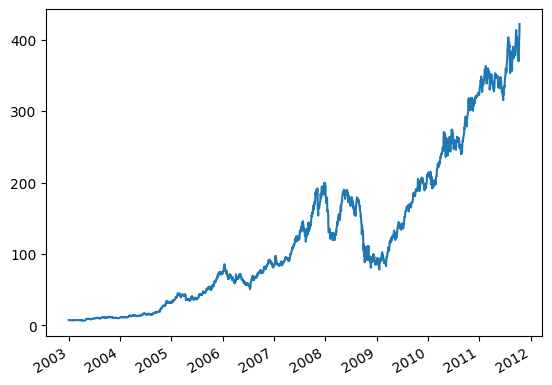

In [360]:
close_px_all=pd.read_csv('https://gitlab.com/Glf9832/pydata-notebook/-/raw/17670dd2026bedd7e9cebba649c1f50d9c34b86c/examples/stock_px_2.csv '
             , index_col=0, parse_dates=True )
close_px_all['AAPL'].plot()



<Axes: >

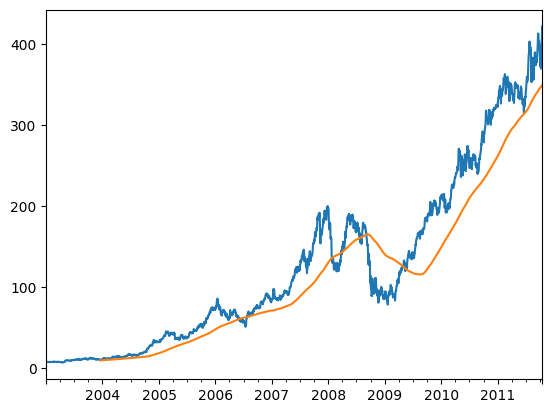

In [371]:
close_px=close_px_all[['AAPL','MSFT','XOM']]
close_px=close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
#이동평균이어서 250 됐을때 부터 첫숫자 

SyntaxError: invalid syntax (3173673925.py, line 1)

In [386]:
p=pd.Period(2007,freq='A-DEC')
p+2
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007', 'A-DEC')

In [380]:
rng=pd.period_range('2001-01-03','2008-08-09', freq='D')
rng

PeriodIndex(['2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06',
             '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10',
             '2001-01-11', '2001-01-12',
             ...
             '2008-07-31', '2008-08-01', '2008-08-02', '2008-08-03',
             '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07',
             '2008-08-08', '2008-08-09'],
            dtype='period[D]', length=2776)

In [383]:
values=['2001Q3']
values

['2001Q3']